In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
sns.set_style("darkgrid")

In [3]:
df = pd.read_csv("/content/spotify.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head

<bound method NDFrame.head of       acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0          0.01020         0.833       204600   0.434          0.021900    2   
1          0.19900         0.743       326933   0.359          0.006110    1   
2          0.03440         0.838       185707   0.412          0.000234    2   
3          0.60400         0.494       199413   0.338          0.510000    5   
4          0.18000         0.678       392893   0.561          0.512000    5   
...            ...           ...          ...     ...               ...  ...   
2012       0.00106         0.584       274404   0.932          0.002690    1   
2013       0.08770         0.894       182182   0.892          0.001670    1   
2014       0.00857         0.637       207200   0.935          0.003990    0   
2015       0.00164         0.557       185600   0.992          0.677000    1   
2016       0.00281         0.446       204520   0.915          0.000039    9   

      liv

In [4]:
df.shape

(2017, 16)

In [5]:
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [6]:
len(df.columns)

16

In [7]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [8]:
### TOP 5 MOST POPULAR ARTISTS ###
top_five_artists = df.groupby("artist").count().sort_values(by="song_title" , ascending=False)["song_title"][:5]
top_five_artists


artist
Drake              16
Rick Ross          13
Disclosure         12
Backstreet Boys    10
WALK THE MOON      10
Name: song_title, dtype: int64

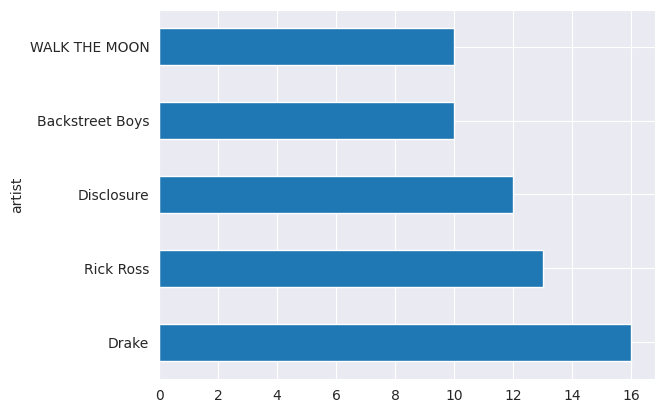

In [9]:
top_five_artists.plot.barh()
plt.show()

In [12]:
### Top 5 Loudest Tracks ###
top_five_loudest_tracks = df[["loudness","song_title"]].sort_values(by="loudness" , ascending=True)[:5]
top_five_loudest_tracks

,loudness,song_title
1594,-33.097,"Lyric Pieces, Book I Op. 12: I. Arietta"
1596,-31.367,"8 Fantasiestücke, Op.12 : 1. Des Abends"
1598,-31.082,"Piano Quartet in E flat, Op.47: 3. Andante can..."
1531,-30.447,"I Was So Young, and You Were So Beautiful"
1549,-29.460,Eleanor


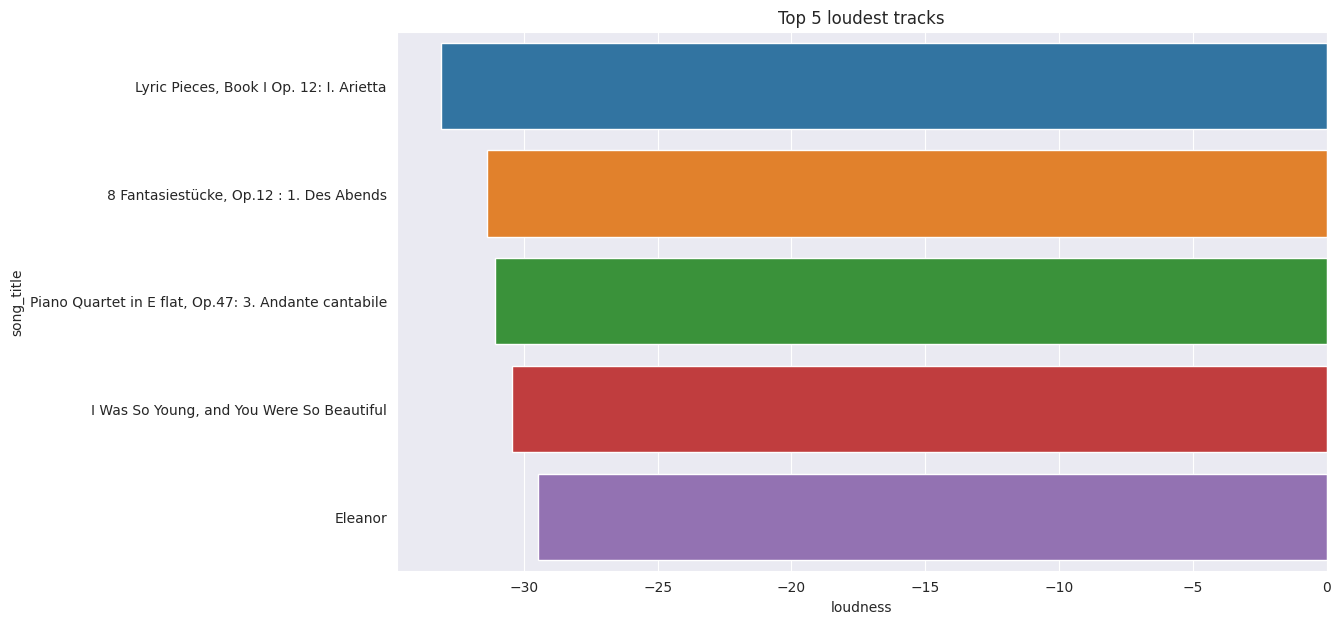

In [13]:
plt.figure(figsize=(12,7))
sns.barplot(x="loudness" , y="song_title", data=top_five_loudest_tracks)
plt.title("Top 5 loudest tracks")
plt.show()

In [14]:
### Artist with the most danceability song ###
top_five_artists_danceable_songs = df[["danceability","song_title","artist"]].sort_values(by="danceability",ascending=False)[:5]
top_five_artists_danceable_songs

,danceability,song_title,artist
1433,0.984,Flashwind - Radio Edit,Ben Remember
1901,0.967,SexyBack,Justin Timberlake
604,0.962,Check Me Out Like,Blaqstarr
32,0.959,Best Friend,Young Thug
1957,0.959,Ice Ice Baby,Vanilla Ice


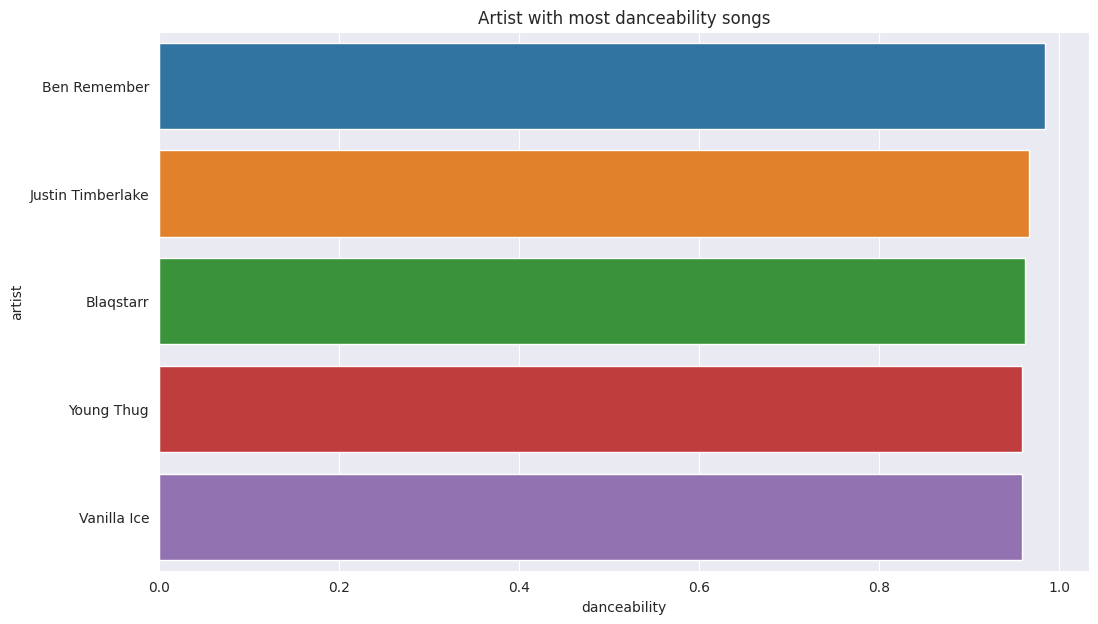

In [18]:
plt.figure(figsize=(12,7))
sns.barplot(x="danceability" , y="artist", data=top_five_artists_danceable_songs)
plt.title("Artist with most danceability songs")
plt.show()

In [20]:
### Top 10 instrumentalness tracks ###
top_ten_instrumental_tracks = df[["instrumentalness", "song_title","artist"]].sort_values(by="instrumentalness",ascending=False)[:5]
top_ten_instrumental_tracks

,instrumentalness,song_title,artist
1313,0.976,Senseless Order,Signs of the Swarm
271,0.968,So Destroyed (channeling Rage Peace),Prince Rama
1575,0.964,A Hundred Dreams from Now,Ray Bryant
1619,0.958,Raven,John Dahlbäck
725,0.957,Strandbar (disko),Todd Terje


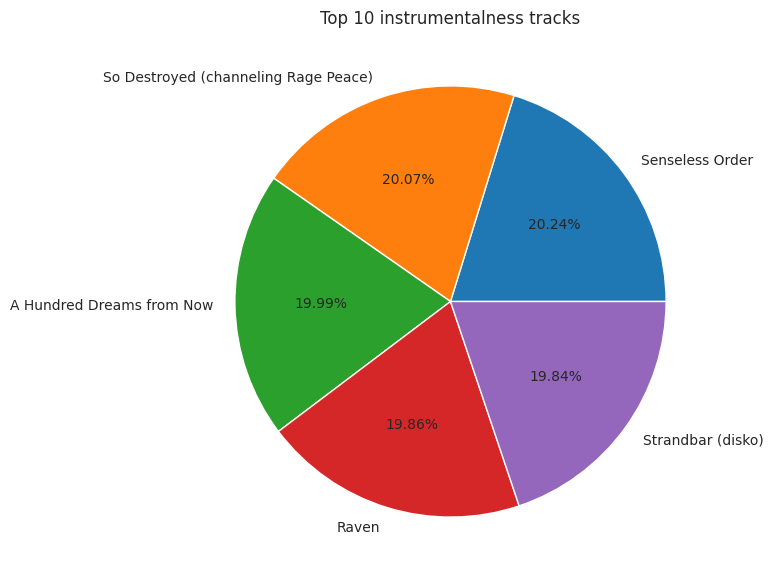

In [27]:
plt.figure(figsize=(12,7))
plt.pie(x="instrumentalness", data=top_ten_instrumental_tracks, autopct='%1.2f%%', labels=top_ten_instrumental_tracks.song_title)
plt.title("Top 10 instrumentalness tracks")
plt.show()

In [28]:
### Multiple feature plots ###
interest_fetaure_cols = ["tempo", "loudness", "acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "liveness", "speechiness", "valence"]


<ipython-input-29-0efd60f19088>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pos_data, bins=30, label="Positive", color="green")
<ipython-input-29-0efd60f19088>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(neg_data, bins=30, label="Negative", color="red")


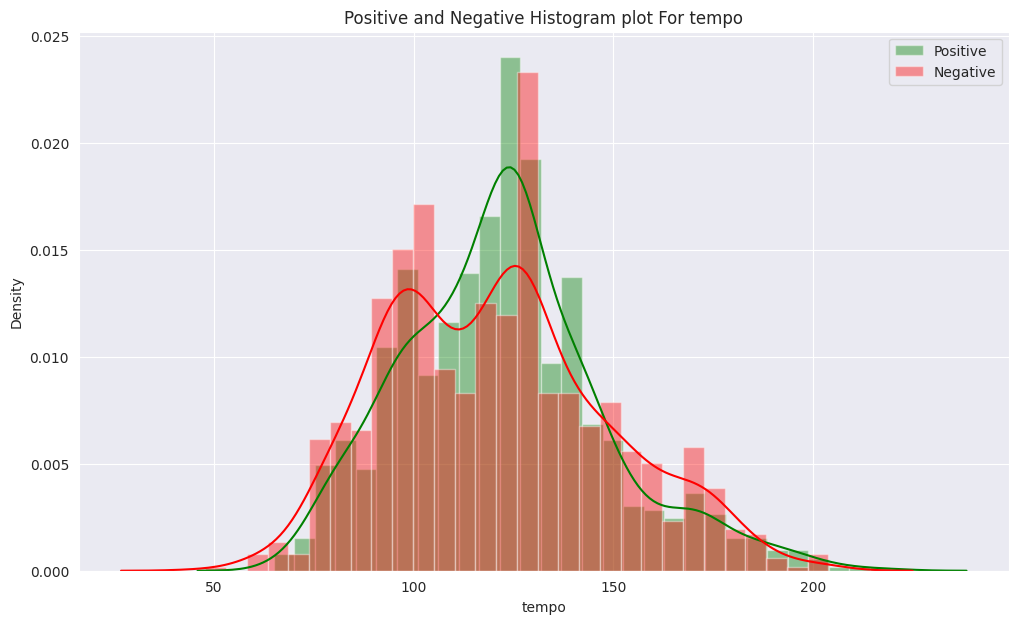

<ipython-input-29-0efd60f19088>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pos_data, bins=30, label="Positive", color="green")
<ipython-input-29-0efd60f19088>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(neg_data, bins=30, label="Negative", color="red")


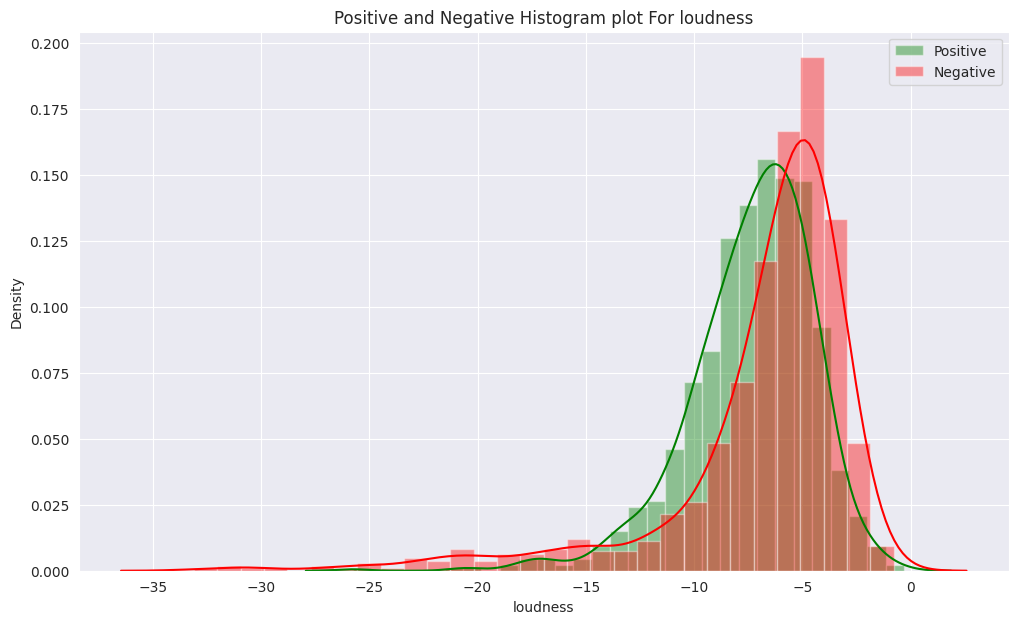

<ipython-input-29-0efd60f19088>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pos_data, bins=30, label="Positive", color="green")
<ipython-input-29-0efd60f19088>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(neg_data, bins=30, label="Negative", color="red")


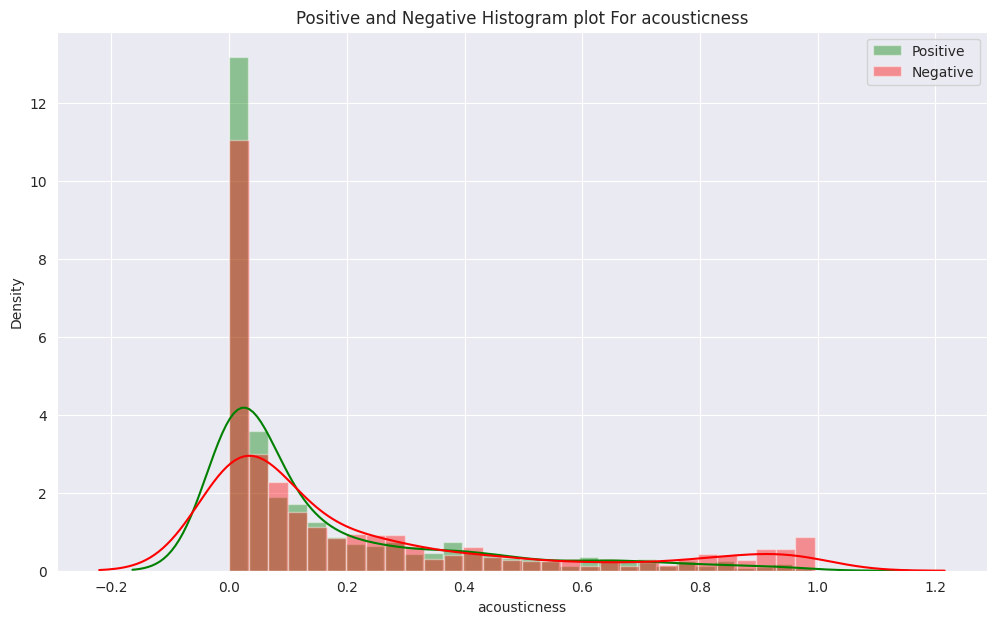

<ipython-input-29-0efd60f19088>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pos_data, bins=30, label="Positive", color="green")
<ipython-input-29-0efd60f19088>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(neg_data, bins=30, label="Negative", color="red")


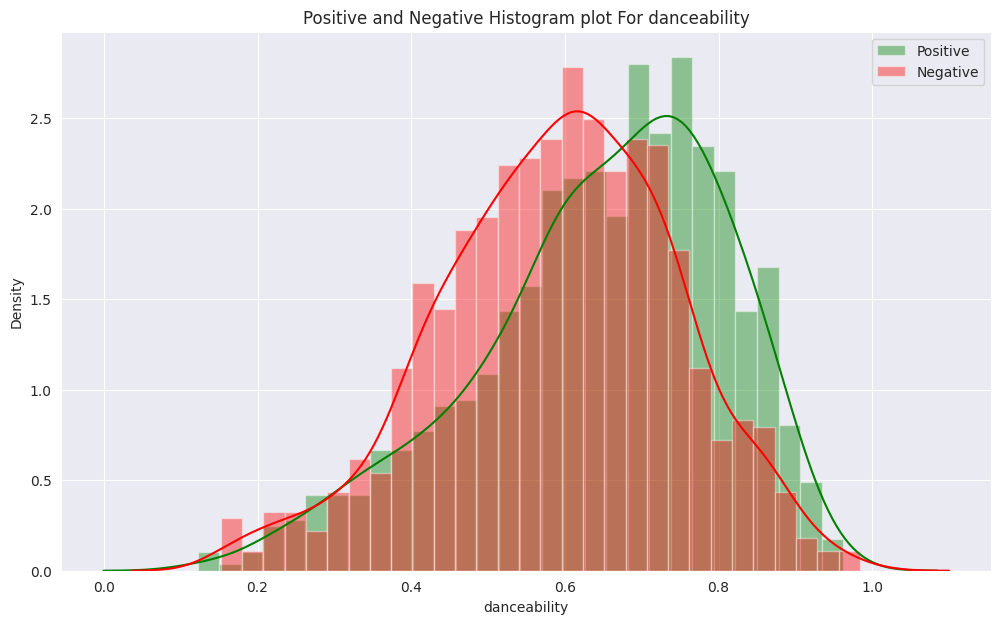

<ipython-input-29-0efd60f19088>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pos_data, bins=30, label="Positive", color="green")
<ipython-input-29-0efd60f19088>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(neg_data, bins=30, label="Negative", color="red")


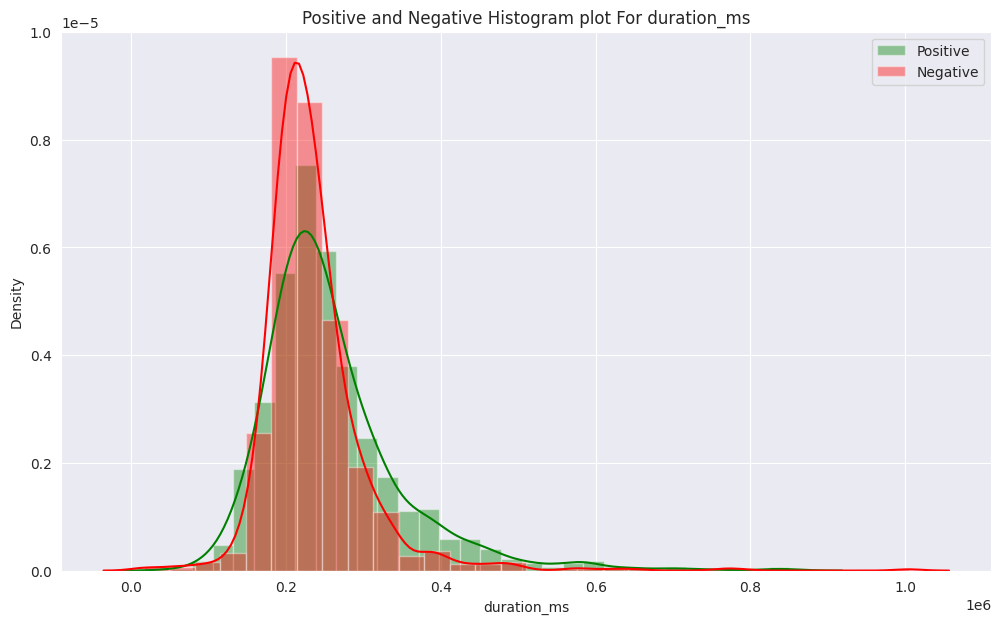

<ipython-input-29-0efd60f19088>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pos_data, bins=30, label="Positive", color="green")
<ipython-input-29-0efd60f19088>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(neg_data, bins=30, label="Negative", color="red")


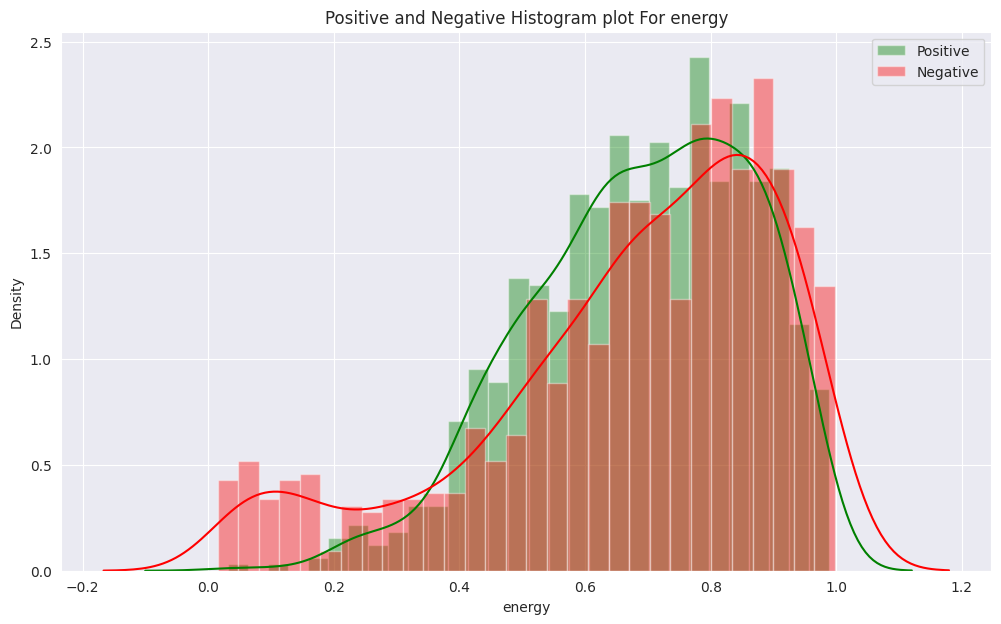

<ipython-input-29-0efd60f19088>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pos_data, bins=30, label="Positive", color="green")
<ipython-input-29-0efd60f19088>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(neg_data, bins=30, label="Negative", color="red")


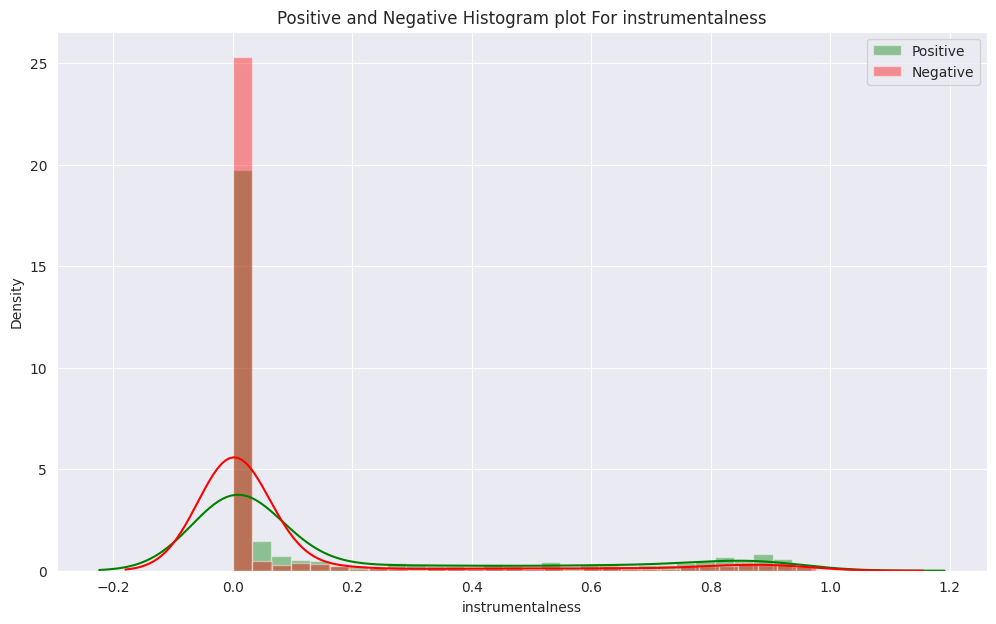

<ipython-input-29-0efd60f19088>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pos_data, bins=30, label="Positive", color="green")
<ipython-input-29-0efd60f19088>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(neg_data, bins=30, label="Negative", color="red")


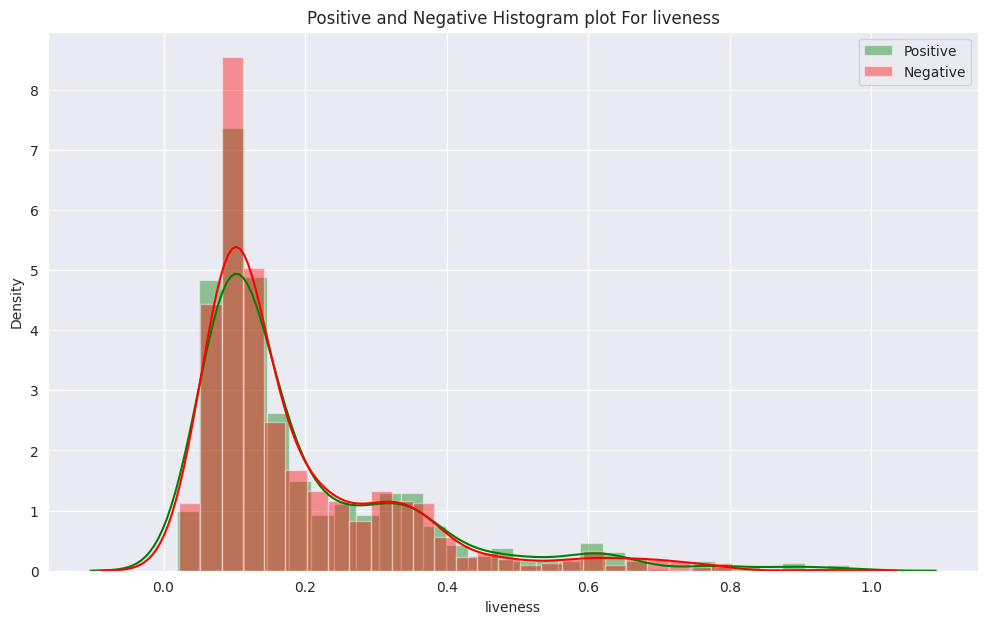

<ipython-input-29-0efd60f19088>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pos_data, bins=30, label="Positive", color="green")
<ipython-input-29-0efd60f19088>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(neg_data, bins=30, label="Negative", color="red")


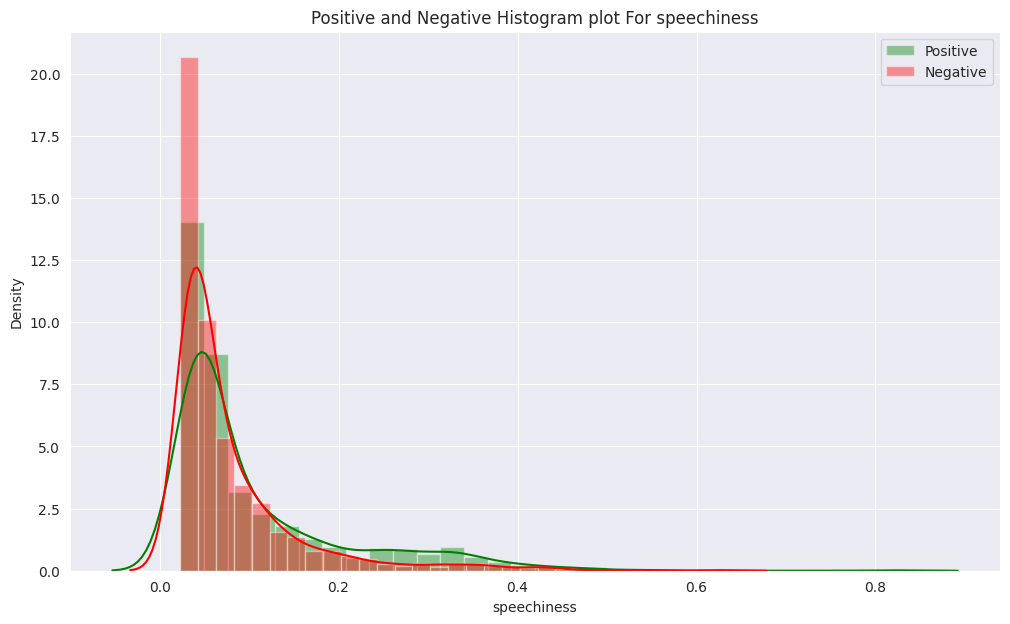

<ipython-input-29-0efd60f19088>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pos_data, bins=30, label="Positive", color="green")
<ipython-input-29-0efd60f19088>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(neg_data, bins=30, label="Negative", color="red")


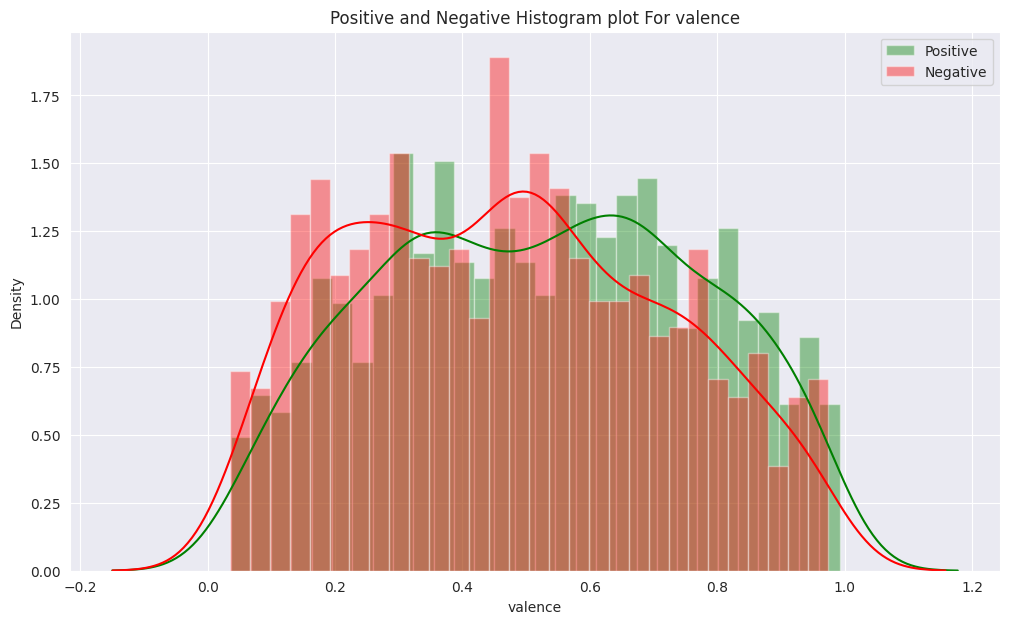

In [29]:
for feature_col in interest_fetaure_cols:
  pos_data = df[df["target"] == 1][feature_col]
  neg_data = df[df["target"] == 0][feature_col]

  plt.figure(figsize=(12,7))

  sns.distplot(pos_data, bins=30, label="Positive", color="green")
  sns.distplot(neg_data, bins=30, label="Negative", color="red")

  plt.legend(loc="upper right")
  plt.title(f"Positive and Negative Histogram plot For {feature_col}")
  plt.show()


In [30]:
df.to_csv("spotify_cleaned_data.csv")